In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import DecisionBoundaryDisplay

In [90]:
# Exercise 1
# 1. Plot
df = pd.read_csv('A1_datasets/A1_datasets/microchips.csv')
print(df)

     0.051267   0.69956  1
0   -0.092742  0.684940  1
1   -0.213710  0.692250  1
2   -0.375000  0.502190  1
3   -0.513250  0.465640  1
4   -0.524770  0.209800  1
..        ...       ... ..
112 -0.720620  0.538740  0
113 -0.593890  0.494880  0
114 -0.484450  0.999270  0
115 -0.006336  0.999270  0
116  0.632650 -0.030612  0

[117 rows x 3 columns]


In [91]:
# The first row had values but were seen as names for the columns.
# I added a new row with A, B, C so that the values could be used for prediction.
df.columns = ['A', 'B', 'C']
df.loc[-1] = [0.051267, 0.69956, 1]  
df.index = df.index + 1 
df.sort_index(inplace=True) 
fail0 = df[(df.C==0)]
x0 = fail0[['A']] 
y0 = fail0[["B"]]
ok1 = df[(df.C==1)]
x1 = ok1[['A']] 
y1 = ok1[["B"]]

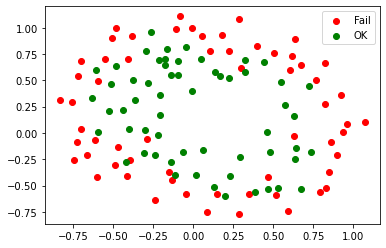

In [92]:
# Plotting datapoints
plt.scatter(x0, y0, color='red')
plt.scatter(x1,y1, color='green')
plt.legend(["Fail" , "OK"])
plt.show()

In [93]:
df = pd.read_csv('A1_datasets/A1_datasets/microchips.csv')

In [94]:
# We use the KNeighborsClassifier instead 
df.columns = ['A', 'B', 'C']
X = df.drop("C", axis=1)
X = X.values
y = df["C"]
y = y.values


In [95]:
# Find knn
lista = [1, 3, 5, 7]
for k in lista:
    print(f'k = {k}')
    neigh = KNeighborsClassifier(n_neighbors=k)
    classifier = neigh.fit(X, y)
    classifier

    if neigh.predict([[-0.3,1.0]]) == 0:
        print(f'chip1: [-0.3, 1.0]: ==> Fail')
    elif neigh.predict([[-0.3,1.0]]) == 1:
        print(f'chip1: [-0.3, 1.0]: ==> OK')
    if neigh.predict([[-0.5, -0.1]]) == 0:
        print(f'chip2: [-0.5, -0.1]: ==> Fail')
    elif neigh.predict([[-0.5, -0.1]]) == 1:
        print(f'chip2: [-0.5, -0.1]: ==> OK')
    if neigh.predict([[0.6, 0.0]]) == 0:
        print(f'chip3: [0.6, 0.0]: ==> Fail')
    elif neigh.predict([[0.6, 0.0]]) == 1:
        print(f'chip3: [0.6, 0.0]: ==> OK')

k = 1
chip1: [-0.3, 1.0]: ==> OK
chip2: [-0.5, -0.1]: ==> Fail
chip3: [0.6, 0.0]: ==> Fail
k = 3
chip1: [-0.3, 1.0]: ==> Fail
chip2: [-0.5, -0.1]: ==> Fail
chip3: [0.6, 0.0]: ==> OK
k = 5
chip1: [-0.3, 1.0]: ==> Fail
chip2: [-0.5, -0.1]: ==> OK
chip3: [0.6, 0.0]: ==> OK
k = 7
chip1: [-0.3, 1.0]: ==> Fail
chip2: [-0.5, -0.1]: ==> Fail
chip3: [0.6, 0.0]: ==> OK


k = 1
training_errors=0
k = 3
training_errors=16
k = 5
training_errors=17
k = 7
training_errors=19


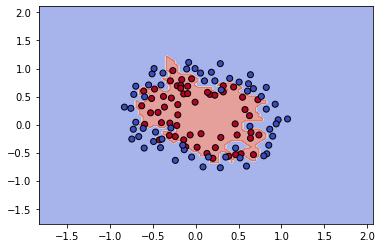

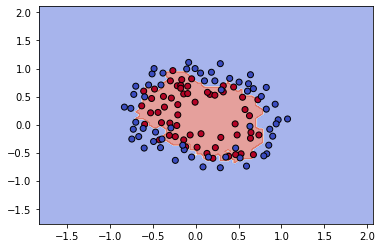

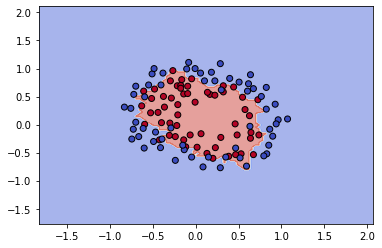

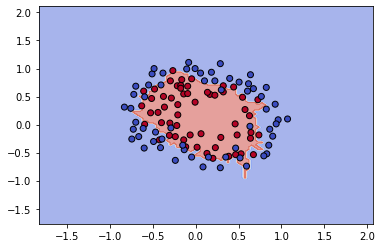

In [96]:
# We import DecisionBoundaryDisplay from sklearn
error_counter = 0
for k in lista:
    neigh = KNeighborsClassifier(n_neighbors=k)
    classifier = neigh.fit(X, y)
    classifier
    error = classifier.predict(X)
    disp = DecisionBoundaryDisplay.from_estimator(classifier, 
                                                  X, 
                                                  response_method="predict",
                                                  alpha=0.5, 
                                                  cmap=plt.cm.coolwarm)
    disp.ax_.scatter(X[:, 0], X[:, 1], 
                     c=y, edgecolor="k",
                     cmap=plt.cm.coolwarm)
    print(f'k = {k}')
    for i in range(117):
        if y[i] != error[i]:
            error_counter += 1
    print(f'training_errors={error_counter}')
    error_counter = 0

In [97]:
X.size

234

In [98]:
neigh = KNeighborsClassifier(n_neighbors=1)
classifier = neigh.fit(X, y)
error = classifier.predict(X)
error_counter = 0
for i in range(117):
    #print(y[i])
    if y[i] != error[i]:
        error_counter += 1
error_counter

0